In [1]:
import numpy as np; 
import matplotlib.pyplot as plt; 
import networkx as nx; 
import os, sys; 
from copy import copy; 
from mpl_toolkits.mplot3d import Axes3D; 
from pathlib import Path
import pandas as pd

In [3]:
routes = pd.read_csv('csvroutes/rutascorpus.csv')
routes = routes.drop('Unnamed: 0',axis = 1)
routes[115:]

routes['corpus'] = routes.route.apply(lambda x: x.split('/')[3].split('-')[-1])
str(routes[routes['language'] == 'Chinese']['corpus'])

'21    GSD\nName: corpus, dtype: object'

In [28]:
info = {'lines':[], 'languages':[]}
for linelimit in range(0,400001,500):
    info['lines'].append(linelimit)
    selection = routes[routes['num_lines']>linelimit]
    info['languages'].append(len(selection))
df = pd.DataFrame(info)
df[df['lines']==50000]
   


,lines,languages
100,50000,50


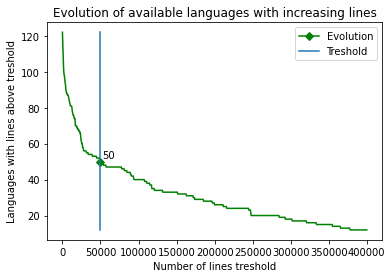

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
values = 50
markers_on = [99]
plt.plot(df['lines'],df['languages'],'-gD',markevery=
markers_on)
plt.plot(np.ones((len(df),1))*50000,df['languages'])
plt.legend(['Evolution','Treshold'])
plt.xlabel('Number of lines treshold')
plt.ylabel('Languages with lines above treshold')
plt.title('Evolution of available languages with increasing lines')
ax.text(60000, values+2, "%d" %values, ha="center")
plt.show()


In [2]:
from utils import file_generator

file_generator(numlines = 50000, routesfile='rutascorpus.csv',lemmatized = True)

39279
41619
41252
39892
36028
40158
43775
44608
30611
43919
38614
42891
39952
42486
40653
41102
43619
42435
42349
37306
43264
43447
41518
44046
41603
45334
39367
39752
39721
41720
32722
41850
34768
32470
38552
43028
35445
42305
41482
42289
40680
43991
35708
42368
43337
40204
37678
39110
44957
39788


In [3]:
from utils import network_gen,dict2json
for file in rutas:
    dic,frame=network_gen(file,linelimit=50000,lemmatized=0)
    name = file.split('/')[3].split('-')[0].replace('UD_','')
    dict2json(dic,f'dictionaries/{name}.json')
    frame = pd.DataFrame(frame).transpose()
    print(frame['count'].sum())
    frame.to_csv(f'dataframes/{name}.csv')


NameError: name 'rutas' is not defined

In [55]:
from utils import csv2df
a = (pd.DataFrame(frame).transpose()).to_csv('prueba.csv')
b = csv2df('prueba.csv')
b['count'].sum()

17790

In [29]:
net = nx.Graph(); 
net.add_nodes_from(dicConnections.keys()); 
for (k, v) in dicConnections.items():
    net.add_edges_from(([(k, t) for t in v])); 

NameError: name 'dicConnections' is not defined

In [ ]:
plt.figure(); 
nx.draw(net, with_labels=False, pos=nx.kamada_kawai_layout(net)); 

plt.show(); 

In [10]:
mostfreq =a[a['count']>7].unique_id.to_list()
len(mostfreq)

394

In [35]:
new_net = {key:net[key] for key in mostfreq}

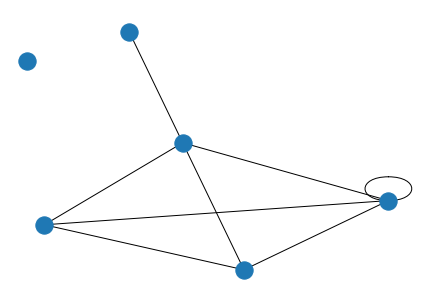

In [45]:
g = nx.Graph(); 
g.add_nodes_from(net.keys()); 
for (k, v) in net.items():
    g.add_edges_from(([(k, t) for t in v])); 
subg = g.subgraph(mostfreq)
plt.figure(); 
nx.draw(subg, with_labels=False, pos=nx.kamada_kawai_layout(subg)); 

plt.show(); 

In [12]:
import helper as h
netName = 'English'
netPath = 'networks/'
fNeighborMean, fNeighborStd = (True, True)
(nodeList, propertiesDict) = h.readNetworkProperties(netName, netPath, fNeighborMean, fNeighborStd); 
(includedProperties, excludedProperties) = h.findPathologicalProperties(propertiesDict); 
[key for key in propertiesDict.keys()][:15]

['degree',
 'eigenvectorCentrality',
 'betweennessCentrality',
 'closenessCentrality',
 'harmonicCentrality',
 'componentSize',
 'pagerank',
 'coreNumber',
 'onionLayer',
 'effectiveSize',
 'nodeCliqueNumber',
 'numberOfCliques',
 'clustering',
 'squareClustering',
 'closenessVitality']

In [22]:
from utils import build_properties_array_languages
arraymeanproperties,dict_pathologies = build_properties_array_languages('networks/')
arraymeanpropertieslemma, dict_pathologies_lemma = build_properties_array_languages('networkslemma/')

{'componentSize_neighborStd', 'closenessVitality_neighborMean', 'componentSize', 'nodeCliqueNumber', 'coreNumber', 'coreNumber_neighborMean', 'nodeCliqueNumber_neighborStd', 'nodeCliqueNumber_neighborMean', 'closenessVitality', 'componentSize_neighborMean', 'coreNumber_neighborStd'}
{'componentSize_neighborStd', 'closenessVitality_neighborMean', 'componentSize', 'closenessVitality', 'componentSize_neighborMean'}


In [8]:
from utils import build_language_mean_dict
meanpropertiesDict, excludedProperties = build_language_mean_dict('Spanish','networks/',True,True)
meanpropertiesDict.keys()

dict_keys(['degree', 'eigenvectorCentrality', 'betweennessCentrality', 'closenessCentrality', 'harmonicCentrality', 'componentSize', 'pagerank', 'coreNumber', 'onionLayer', 'effectiveSize', 'nodeCliqueNumber', 'numberOfCliques', 'clustering', 'squareClustering', 'closenessVitality', 'constraint', 'degree_neighborMean', 'eigenvectorCentrality_neighborMean', 'betweennessCentrality_neighborMean', 'closenessCentrality_neighborMean', 'harmonicCentrality_neighborMean', 'componentSize_neighborMean', 'pagerank_neighborMean', 'coreNumber_neighborMean', 'onionLayer_neighborMean', 'effectiveSize_neighborMean', 'nodeCliqueNumber_neighborMean', 'numberOfCliques_neighborMean', 'clustering_neighborMean', 'squareClustering_neighborMean', 'closenessVitality_neighborMean', 'constraint_neighborMean', 'degree_neighborStd', 'eigenvectorCentrality_neighborStd', 'betweennessCentrality_neighborStd', 'closenessCentrality_neighborStd', 'harmonicCentrality_neighborStd', 'componentSize_neighborStd', 'pagerank_nei

In [3]:
valid1

['degree',
 'eigenvectorCentrality',
 'betweennessCentrality',
 'closenessCentrality',
 'harmonicCentrality',
 'pagerank',
 'coreNumber',
 'onionLayer',
 'effectiveSize',
 'nodeCliqueNumber',
 'numberOfCliques',
 'clustering',
 'squareClustering',
 'closenessVitality',
 'constraint',
 'degree_neighborMean']

In [1]:
from utils import build_properties_array_languages
valid1, arraymeanproperties,dict_pathologies, list_excluded, totals = build_properties_array_languages('files/inflected/networks/',primaries = True)

{'componentSize', 'componentSize_neighborStd', 'componentSize_neighborMean'}


In [3]:
from utils import load_network, csv2df

netName = 'Spanish'
folderframe = 'files/inflected/dataframes'
folderdict = 'files/inflected/dictionaries'
langframe = csv2df(f'{folderframe}/{netName}.csv')
mostfreq =langframe.unique_id.to_list()
jsonfile = f'{folderdict}/{netName}.json'
thisNetwork = load_network(jsonfile)
thisNetwork=thisNetwork.subgraph(mostfreq)

Gcc = sorted(nx.connected_components(thisNetwork), key=len, reverse=True); 
thisNetwork = nx.Graph(thisNetwork.subgraph(Gcc[0])); 
nNodes = len(thisNetwork.nodes()); 
nEdges = thisNetwork.number_of_edges(); 